참조 https://hyunlee103.tistory.com/39   
https://m.blog.naver.com/sooftware/221646956569

In [1]:
import librosa
import librosa.display as dsp
import matplotlib.pyplot as plt

[ 0.00841141  0.00912857  0.00920486 ... -0.008358   -0.00867462
 -0.0079155 ] (160000,)


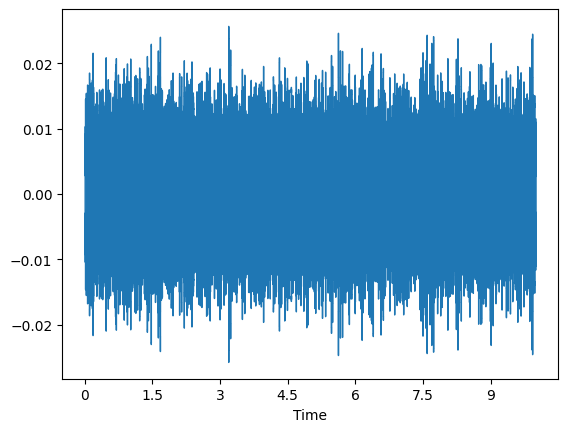

In [2]:
data, sample_rate = librosa.load('../../data/mimii/0_dB/fan/id_00/normal/00000000.wav', sr=16000)
print(data,data.shape)

#파형을 그래프로 그림
dsp.waveshow(data,sr=sample_rate)
plt.show()

#소리 재생
from IPython.display import Audio

Audio(data=data,rate=sample_rate)

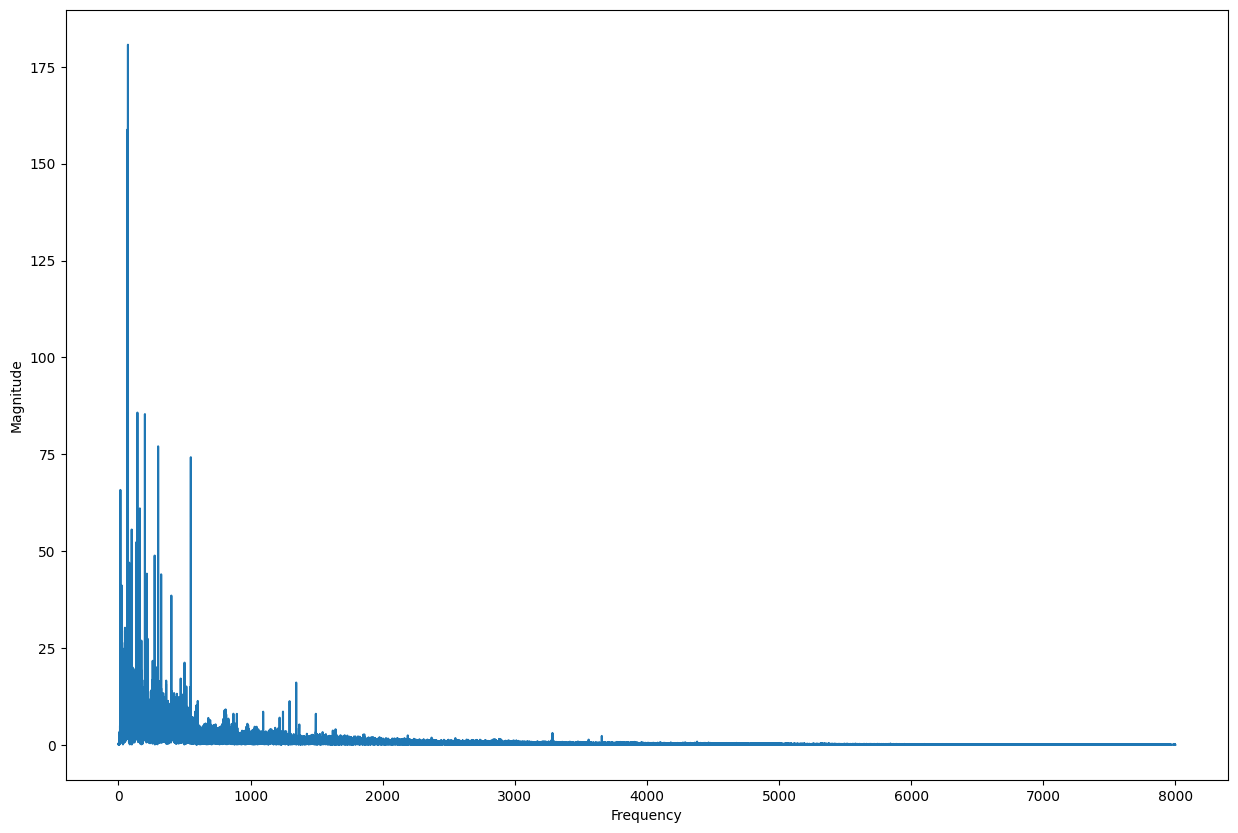

In [3]:
import numpy as np

# 퓨리에 연산을 빠르게 수행해주는 fft(Fast Fourier Transform)을 사용하여 변환
# 퓨리에 연산 시(np.fft.fft()) 실수부와 허수부를 반환함
fft = np.fft.fft(data) 
magnitude = np.abs(fft)

# 0부터 sample_rate까지 magnitude의 개수만큼의 배열값을 만듬
frequency = np.linspace(0, sample_rate, len(magnitude))

# 실수부만 보기 위해 변환값에 절대값을 씌우고, 반으로 나누면 실수부만 데이터를 확인할 수 있다.
# 실수부와 허수부는 동일한 값을 가지고 있고, 여기서는 데이터 해석의 목적만 가지므로 실수부만 본다.
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

fig = plt.figure(figsize = (15,10))
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

Text(0.5, 1.0, 'Spectrogram (dB)')

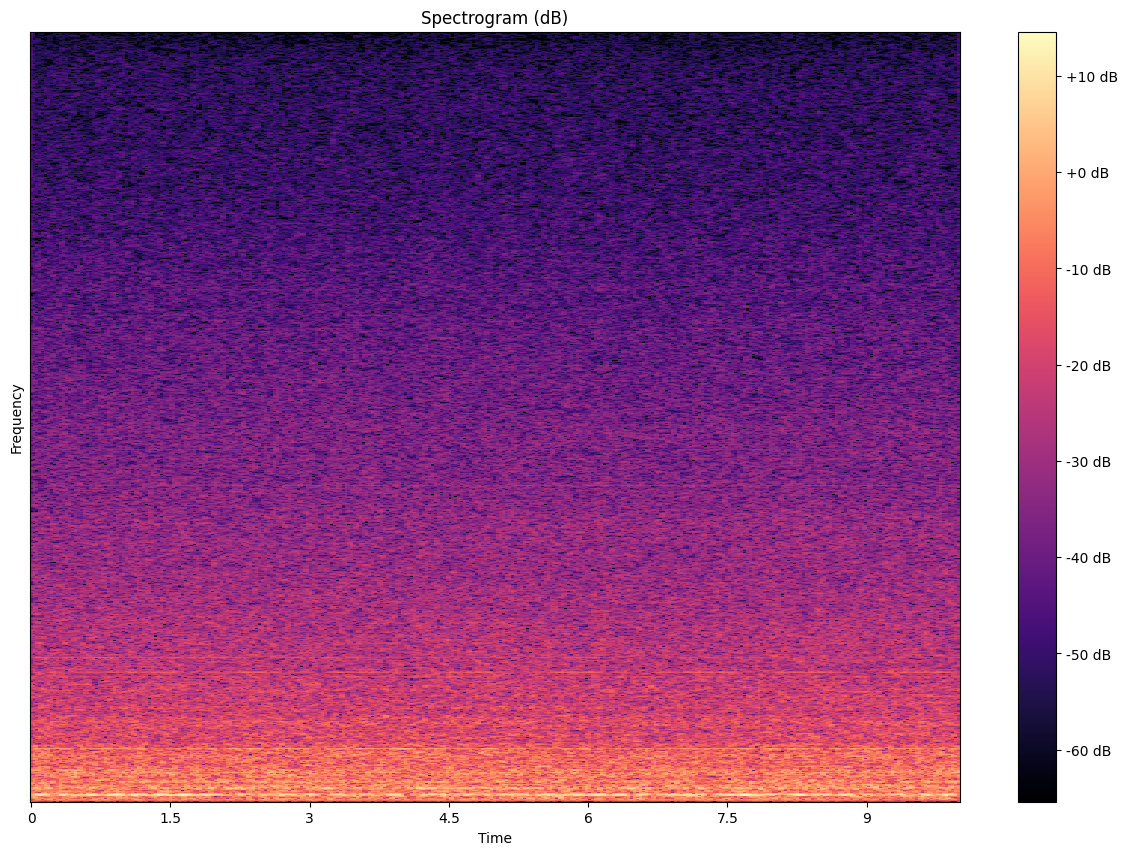

In [4]:
# STFT는 단순 푸리에 변환과 다르게 시간 정보를 보존하기 위해, frame 단위로 FFT를 수행
# 따라서 frame 수와 frame 당 sample 수를 지정해주어야 함
# 또한 Spectrogram에서는 dB 값을 사용하므로, 푸리에 변환의 결과인 magnitude에 로그 Scaling을 통해 dB로 변환

# STFT -> spectrogram
hop_length = 512  # 전체 frame 수
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

# STFT
stft = librosa.stft(data, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)
magnitude
# magnitude > Decibels 
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize = (15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

(13, 313)


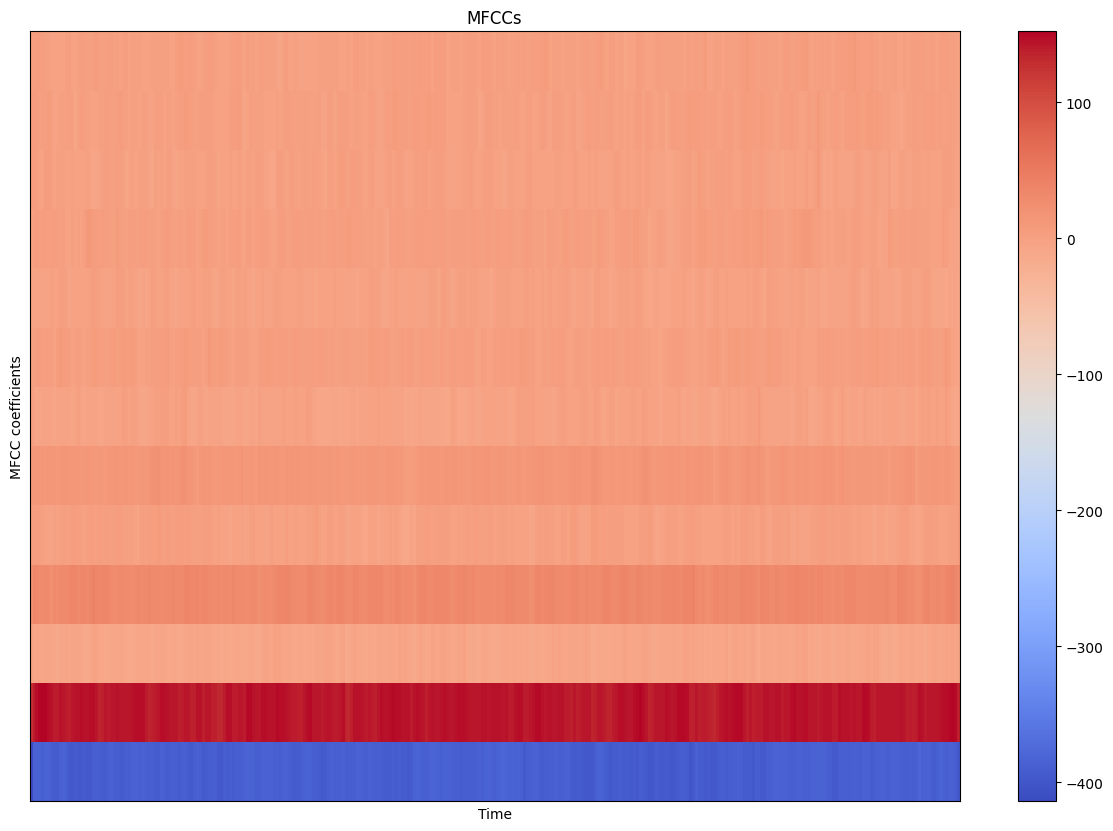

In [5]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y=data, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
print(MFCCs.shape)
# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# # show plots
plt.show()

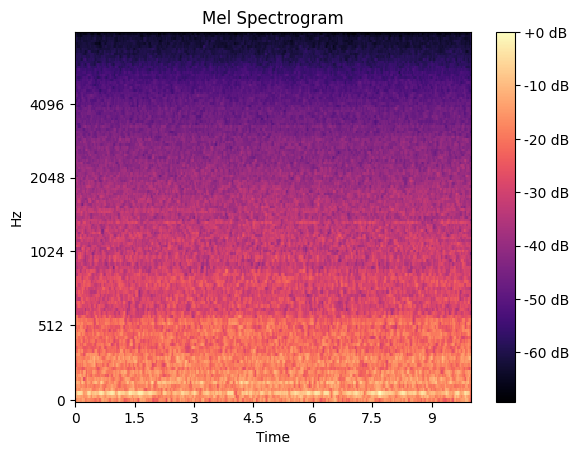

In [10]:
mel_spec = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_fft=2048, hop_length=512)
mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

# plt.figure()
librosa.display.specshow(mel_spec, y_axis='mel', fmax=8000, x_axis='time', sr=sample_rate)
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')